In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,TensorBoard, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, LeakyReLU 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import os
import numpy as np

# plotting
import matplotlib.pyplot as plt
import pathlib
from PIL import Image
import IPython.display as display

# to display confusion matrix
import seaborn as sn
import pandas as pd

In [47]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == classNames

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_png(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [WIDTH, HEIGHT])


def get_bytes_and_label(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label


In [48]:
def show_accuracies(labels, test): 

    fig, ax = plt.subplots()
    print(test)
    X = np.arange(len(test))
    nova = []
    for lista in test:
        nova.append(lista[1])
    print(nova)
    #plt.figure(figsize=(20,15))
    plt.bar(X, nova, width = 0.4, color = 'b', label='test')
    #plt.bar(X + 0.4, val, color = 'r', width = 0.4, label = "val")
    plt.xticks(X + 0.4 / 2, labels)
    plt.ylim(top = 1.0, bottom = 0.97)
    plt.legend(loc='upper left')
    plt.show()   

In [49]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Avasilable: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Avasilable:  1


In [50]:
pathTrain = 'GTSRB_TP/train_images'
#pathTrainBalance = 'GTSRB_TP/train_images'
pathTest = 'GTSRB_TP/test_images'

In [51]:
BATCH_SIZE = 64
HEIGHT = 32
WIDTH = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE
#Classes names
data_dir = pathlib.Path(pathTrain)
classNames = np.array(os.listdir(data_dir))
print(classNames)

['00013' '00025' '00003' '00028' '00035' '00026' '00036' '00027' '00001'
 '00019' '00020' '00042' '00002' '00038' '00021' '00024' '00034' '00029'
 '00033' '00006' '00041' '00017' '00030' '00009' '00040' '00000' '00004'
 '00015' '00008' '00012' '00016' '00037' '00022' '00039' '00010' '00031'
 '00005' '00011' '00023' '00018' '00014' '00032' '00007']


In [52]:
trained_models = ['TrainModels/noAugmentation.ckpt', 'TrainModels/noAugmentation_Balance.ckpt', 'TrainModels/static_Augmentation.ckpt', 'TrainModels/static_Augmentation_balance.ckpt', 'TrainModels/static_Augmentation_B.ckpt','TrainModels/Dynamic_Augmentation.ckpt', 'TrainModels/Massive_Augmentation.ckpt']
numers = [0, 1, 2, 3, 4,5, 6]

In [53]:
listset = tf.data.Dataset.list_files(pathTest+"/*/*.png")
test_Data = listset.map(get_bytes_and_label, num_parallel_calls = AUTOTUNE)

In [54]:
test_Data = test_Data.batch(batch_size = BATCH_SIZE)

In [55]:
model = Sequential()

model.add(Conv2D(128, (5, 5),
                    input_shape=(32, 32, 3)))         
model.add(LeakyReLU(alpha=0.01))  
model.add(BatchNormalization())
model.add(Dropout(0.5)) 

model.add(Conv2D(196, (5, 5) )) 
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5)) 

model.add(Conv2D(256, (5, 5) ) )   
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5)) 

model.add(Flatten())
model.add(LeakyReLU(alpha=0.0)) 
model.add(Dense(384))
model.add(LeakyReLU(alpha=0.0))             
model.add(Dropout(0.5)) 

model.add(Dense(43, activation='softmax'))


opt = Adam(learning_rate=0.0001)

model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=[ 'accuracy'])

In [56]:
modelsloaded = []
for i in range(len(trained_models)):
    print(trained_models[i])
    model.load_weights(trained_models[i])
    modelsloaded.append(model.evaluate(test_Data, verbose=2))



TrainModels/noAugmentation.ckpt
198/198 - 5s - loss: 0.0735 - accuracy: 0.9789 - 5s/epoch - 26ms/step
TrainModels/noAugmentation_Balance.ckpt
198/198 - 5s - loss: 0.0462 - accuracy: 0.9906 - 5s/epoch - 26ms/step
TrainModels/static_Augmentation.ckpt
198/198 - 5s - loss: 0.0384 - accuracy: 0.9878 - 5s/epoch - 25ms/step
TrainModels/static_Augmentation_balance.ckpt
198/198 - 5s - loss: 0.0630 - accuracy: 0.9862 - 5s/epoch - 25ms/step
TrainModels/static_Augmentation_B.ckpt
198/198 - 5s - loss: 0.0801 - accuracy: 0.9808 - 5s/epoch - 25ms/step
TrainModels/Dynamic_Augmentation.ckpt
198/198 - 5s - loss: 0.0418 - accuracy: 0.9873 - 5s/epoch - 25ms/step
TrainModels/Massive_Augmentation.ckpt
198/198 - 5s - loss: 0.0236 - accuracy: 0.9937 - 5s/epoch - 25ms/step


[[0.07347549498081207, 0.9788598418235779], [0.0462486669421196, 0.9905779957771301], [0.03843856602907181, 0.9878067970275879], [0.0629824846982956, 0.9862232804298401], [0.08010955899953842, 0.9808392524719238], [0.04175510257482529, 0.9872525930404663], [0.023584410548210144, 0.993665874004364]]
[0.9788598418235779, 0.9905779957771301, 0.9878067970275879, 0.9862232804298401, 0.9808392524719238, 0.9872525930404663, 0.993665874004364]


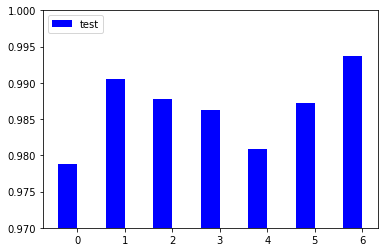

In [57]:
show_accuracies(numers, modelsloaded)